# Integrantes

Numero de Cuenta-Nombre

20211021557-Erick Josue Sosa Aleman 

20221001175-Jose Francisco Vargas Carrasco

In [697]:
import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import truncnorm
from scipy.stats import chi2_contingency
from collections import defaultdict




# Leer Dataset

In [698]:
#Enlace del dataset original
#https://www.kaggle.com/datasets/anandshaw2001/customer-churn-dataset

dataset=pd.read_csv("Dataset/Churn_Modelling.csv")

dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Limpieza de Datos


Eliminar la columna RowNumber que es Redundante al ya tener CustomerID

In [699]:
#Eliminamos una columna redundante que es el RowNumber
df=dataset.drop(columns=['RowNumber'])
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Analizar Tipos de Datos 

In [700]:
df.dtypes


CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

El nombre de las columnas es claro y estandarizado por ende no es necesario un renombramiento

# Descripcion y Clasificacion de 

- **CustomerId**: Identificador único del cliente (tipo: int64).
- **Surname**: Apellido(Sobrenombre) del cliente (tipo: object).
- **CreditScore**: Puntuación de crédito del cliente (tipo: int64).
- **Geography**: País de residencia del cliente (tipo: object).
- **Gender**: Género del cliente (tipo: object).
- **Age**: Edad del cliente (tipo: int64).
- **Tenure**: Tiempo en años que el cliente ha estado con la empresa (tipo: int64).
- **Balance**: Saldo de la cuenta del cliente (tipo: float64).
- **NumOfProducts**: Número de productos que el cliente tiene con la empresa (tipo: int64).
- **HasCrCard**: Indica si el cliente tiene tarjeta de crédito (tipo: int64).
- **IsActiveMember**: Indica si el cliente es un miembro activo (tipo: int64).
- **EstimatedSalary**: Salario estimado del cliente (tipo: float64).
- **Exited**: Indica si el cliente ha dejado la empresa (tipo: int64).


| Numericas       | Categoricas   | Otras     |
| --------------- | ------------- | --------- |
| CreditScore     | Geography     | CustomerID|
| Age             | Gender        | Surname   |
| Tenure          | HasCrCard     |           |
| Balance         | IsActiveMember|           |
| NumOfProducts   | Exited        |           |
| EstimatedSalary |               |           |

# Haciendo un Analisis Exploratorio de los Datos

### Primero vamos convertir la columnas numericas discretas a String

In [701]:
df["HasCrCard"] = df["HasCrCard"].astype(str)
df["IsActiveMember"] = df["IsActiveMember"].astype(str)
df["Exited"] = df["Exited"].astype(str)

In [702]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

### Hacemos un describe del detaset original

In [703]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


### Observando la distribucion de las categorias principales

In [704]:
cat_cols = [ c for c in df.columns if df[c].dtype == "object" ]

del cat_cols[0]

cat_cols

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [705]:
for a in cat_cols:
    print( df[a].value_counts(), "\n" )

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

Gender
Male      5457
Female    4543
Name: count, dtype: int64 

HasCrCard
1    7055
0    2945
Name: count, dtype: int64 

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64 

Exited
0    7963
1    2037
Name: count, dtype: int64 



### Observando la correlacion entre variables numericas

In [706]:
df_cols_numericas = df.select_dtypes( include= "number" )

In [707]:
matriz_correlacion = df_cols_numericas.corr()

matriz_correlacion

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,0.015271
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


En la matriz de correlacion de Pearson el coeficiente de correlacion puede tomar un rango de valores de +1 a -1. 
- Un valor de 0 indica que no hay asociacion entre las variables.
- Un valor mayor que 0 indica una asociacion positiva.
- Un valor menor que 0 indica una asociacion negativa.

### Observando correlacion entre las categorias con las que se trabajará

In [708]:
df_categorias = pd.crosstab( df["Geography"], df["Exited"]) 

df_categorias

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [709]:
chi2, p, dof, expected = chi2_contingency(df_categorias)


if p < 0.05:
    print("Existe correlacion")
else:
     print("No existe correlacion")

Existe correlacion


El valor de p es menor que 0.05 entonces podemos decir que hay una relacion significativa entre la variables

### Agrupando la informacion para obtener las distribuciones probabilisticas

Estaremos usando las siguientes categorías:

- Geography
- Exited

In [710]:
cats_agrupar = ["Geography", "Exited"]

prob_freq = df.groupby( cats_agrupar , as_index= False ).agg({
    "CustomerId": ["count"]
})

prob_freq.columns = cats_agrupar + ["Customers"]

In [711]:
prob_freq

,Geography,Exited,Customers
0,France,0,4204
1,France,1,810
2,Germany,0,1695
3,Germany,1,814
4,Spain,0,2064
5,Spain,1,413


In [712]:
prob_freq["Customers"] = prob_freq["Customers"] / df.shape[0]

In [713]:
prob_freq

,Geography,Exited,Customers
0,France,0,0.4204
1,France,1,0.0810
2,Germany,0,0.1695
3,Germany,1,0.0814
4,Spain,0,0.2064
5,Spain,1,0.0413


# Limpiando valores atipicos

In [714]:
num_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

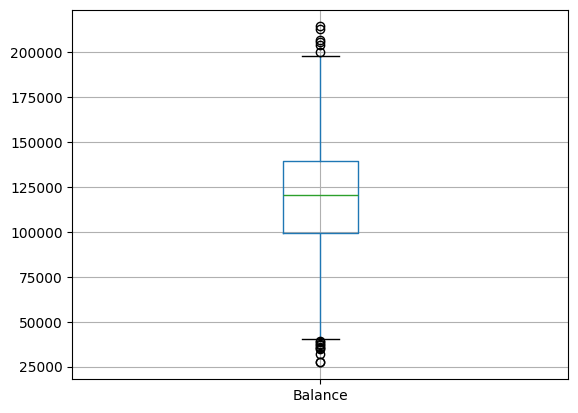

In [715]:
df.loc[
    (df["Geography"] == "Germany")
    & (df["Exited"] == "0"),
    ["Balance"]
].boxplot()

plt.show()

### Calculamos lower bound y upper bound de las columnas numericas

In [716]:
lower_upper_bouds = {}
new_cols = []
for c in num_cols:
    
    lower_upper_bouds[c] = [ 
            ( 'lower_bound' , lambda x: x.quantile(.25) - 1.5*(x.quantile(.75) - x.quantile(.25))  )
            , ( 'upper_bound' , lambda x: x.quantile(.75) + 1.5*(x.quantile(.75) - x.quantile(.25))  )
    ]


    new_cols.append( f"{c}_lower_bound" )
    new_cols.append( f"{c}_upper_bound" )

In [717]:
df_bounds = df.groupby( cats_agrupar , as_index=False ).agg(lower_upper_bouds)

In [718]:
df_bounds.columns =  cats_agrupar + new_cols

In [719]:
df_bounds

,Geography,Exited,CreditScore_lower_bound,CreditScore_upper_bound,Age_lower_bound,Age_upper_bound,Tenure_lower_bound,Tenure_upper_bound,Balance_lower_bound,Balance_upper_bound,NumOfProducts_lower_bound,NumOfProducts_upper_bound,EstimatedSalary_lower_bound,EstimatedSalary_upper_bound
0,France,0,380.50,920.50,16.0,56.0,-3.625,13.375,-179736.17625,299560.29375,-0.5,3.5,-95897.66000,294190.64000
1,France,1,360.00,920.00,17.0,73.0,-7.000,17.000,-193492.93125,322488.21875,-0.5,3.5,-92625.40625,303125.24375
2,Germany,0,387.25,921.25,16.0,56.0,-7.000,17.000,39261.91000,199924.47000,-0.5,3.5,-96890.72250,302556.37750
3,Germany,1,361.00,943.00,21.0,69.0,-7.000,17.000,69453.71500,170968.05500,-0.5,3.5,-105389.00875,301128.50125
4,Spain,0,395.00,907.00,14.5,58.5,-4.500,15.500,-179708.83500,299514.72500,-0.5,3.5,-96210.10500,291864.23500
5,Spain,1,384.50,916.50,16.0,72.0,-5.500,14.500,-191490.69000,319151.15000,-0.5,3.5,-85505.22500,295411.53500


In [720]:
df_resultados = df.merge(
    df_bounds,
    on=cats_agrupar,
    how="inner"
)

In [721]:
for c in num_cols:
    print( f" Row: { df_resultados.shape[0] } " )
    print( f" {c}: processing... " )
    
    df_resultados = df_resultados.loc[ 
        ( df_resultados[c] > df_resultados[f"{c}_lower_bound"] )
        &
        ( df_resultados[c] < df_resultados[f"{c}_upper_bound"] )
        , :
    ]
print("Completed!")


 Row: 10000 
 CreditScore: processing... 
 Row: 9988 
 Age: processing... 
 Row: 9505 
 Tenure: processing... 
 Row: 9505 
 Balance: processing... 
 Row: 9485 
 NumOfProducts: processing... 
 Row: 9425 
 EstimatedSalary: processing... 
Completed!


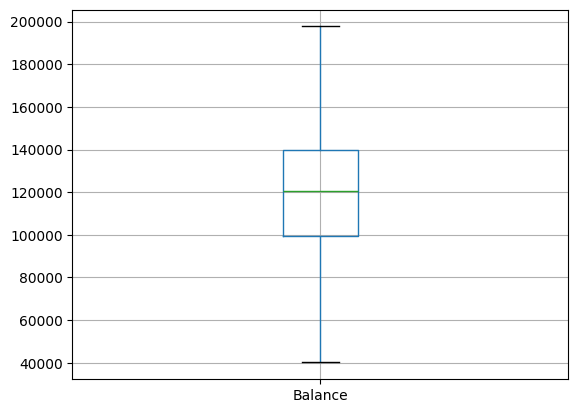

In [722]:
df_resultados.loc[
    (df["Geography"] == "Germany")
    & (df["Exited"] == "0"),
    ["Balance"]
].boxplot()

plt.show()

# Realizando resumen estadistico para realizar la simulacion

In [723]:
df_expandir = df_resultados.loc[ : , cats_agrupar + num_cols ]


In [724]:
funciones_resumen = {}
cols_resumen = []

for c in num_cols:
    funciones_resumen[c] = [ "min", "max", "mean", "std" ]
    cols_resumen.append( f"{c}_min" )
    cols_resumen.append( f"{c}_max" )
    cols_resumen.append( f"{c}_mean" )
    cols_resumen.append( f"{c}_std" )


In [725]:
df_resumen = df_expandir.groupby(
    cats_agrupar,
    as_index= False
).agg(funciones_resumen)

In [726]:
df_resumen.columns = cats_agrupar + cols_resumen

In [727]:
df_resumen

,Geography,Exited,CreditScore_min,CreditScore_max,CreditScore_mean,CreditScore_std,Age_min,Age_max,Age_mean,Age_std,...,Balance_mean,Balance_std,NumOfProducts_min,NumOfProducts_max,NumOfProducts_mean,NumOfProducts_std,EstimatedSalary_min,EstimatedSalary_max,EstimatedSalary_mean,EstimatedSalary_std
0,France,0,408,850,650.834474,96.196831,18,55,35.371610,7.033303,...,60621.637323,63609.761656,1,3,1.541191,0.507439,90.07,199929.17,99574.770497,57452.642528
1,France,1,373,850,642.967742,98.257257,18,71,44.963871,9.667267,...,71314.742452,66990.625823,1,3,1.384516,0.669967,123.07,199378.58,102531.260542,57637.802584
2,Germany,0,405,850,654.027830,97.176893,18,55,35.533839,7.111118,...,119386.274611,28779.806566,1,3,1.555977,0.509589,343.38,199970.74,102609.940025,58042.340840
3,Germany,1,365,850,648.648052,99.675883,22,68,44.850649,9.162017,...,120501.720987,18809.040350,1,3,1.364935,0.661453,11.58,199808.10,97651.613013,58825.634302
4,Spain,0,413,850,651.724156,93.301779,18,58,36.218526,7.647297,...,59438.428982,63391.115756,1,3,1.550154,0.511809,479.54,199992.48,98508.900164,57082.402057
5,Spain,1,386,850,651.742500,93.418809,18,71,44.142500,10.161710,...,71691.065650,67007.884119,1,3,1.467500,0.707244,417.41,199304.74,103342.685950,56628.307139


## Probabilidad de Ocurrencia de las variables categoricas restantes 

In [728]:
def calcular_probabilidades_cualitativas(df, columna, redondear=4):
    """
    Calcula las probabilidades para una variable cualitativa
    
    Parámetros:
    df: DataFrame
    columna: str - Nombre de la columna cualitativa
    redondear: int - Decimales para redondear (None para no redondear)
    
    Retorna:
    dict - {Categoría: probabilidad}
    """
    
    # Validaciones
    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame")
        
    # Convertir a categórico y calcular frecuencias
    serie = df[columna].astype(str).str.strip().replace({'nan': None}).dropna()
    
    if serie.empty:
        return {}
    
    # Calcular probabilidades
    probabilidades = serie.value_counts(normalize=True, dropna=True)
    
    # Redondear si se especifica
    if redondear is not None:
        probabilidades = probabilidades.round(redondear)
    
    return probabilidades.to_dict()

## Diccionario con la probabilidad de ocurrencia de las columnas


In [729]:
#Columnas categoricas a simular
columnas_categoricas_simuladas = ['Gender', 
            'HasCrCard', 
            'IsActiveMember']

# Inicializar diccionario combinado
probabilidades_combinadas = {}


# Inicializar diccionario combinado
probabilidades_combinadas = {}

for col in columnas_categoricas_simuladas:
    probabilidades = calcular_probabilidades_cualitativas(df, col)

    
    # Agregar al diccionario combinado
    probabilidades_combinadas[col] = probabilidades

probabilidades_combinadas


{'Gender': {'Male': 0.5457, 'Female': 0.4543},
 'HasCrCard': {'1': 0.7055, '0': 0.2945},
 'IsActiveMember': {'1': 0.5151, '0': 0.4849}}

## Simulacion de Variables Categoricas
- Gender
- HasCrCard
- IsActiveMember

In [730]:
def generar_dataframe_categorico(probabilidades, n_registros=1000, semilla=None):
    """
    Genera un DataFrame manteniendo las distribuciones especificadas 
    Con weighted random.choices
    
    Parametros:
        probabilidades (dict): Diccionario con las probabilidades por columna
        n_registros (int): Cantidad de registros a generar
        semilla (int): Semilla para reproducibilidad
        
    Returns:
        pd.DataFrame: DataFrame con los registros generados
    """

    # Semilla para reproducibilidad
    if semilla is not None:
        random.seed(semilla)
    
    datos = defaultdict(list)  # Ahora debería funcionar
    
    for _ in range(n_registros):
        for columna, dist in probabilidades.items():

            # Convertir a listas y asegurar tipos
            opciones = [str(key) for key in dist.keys()]

            # Pesos probabilisticos 
            pesos = [float(val) for val in dist.values()]
            
            # Generar elección ponderada
            eleccion = random.choices(
                population=opciones,
                weights=pesos,
                k=1
            )[0]
            
            # Convertir a int si es numérico
            if columna in ['HasCrCard', 'IsActiveMember']:
                eleccion = int(eleccion)
            
            datos[columna].append(eleccion)
    
    return pd.DataFrame(datos)

# Simulando el DF final

In [731]:
num_registros = 100000
semilla=77753210
np.random.seed(semilla)


In [732]:


#df_categoricas_simulado=generar_dataframe_categorico(probabilidades_combinadas, n_registros=num_registros)
#Usando una semilla para reproducibilidad
df_categoricas_simulado=generar_dataframe_categorico(probabilidades_combinadas, n_registros=num_registros,semilla=semilla)

df_categoricas_simulado

,Gender,HasCrCard,IsActiveMember
0,Male,1,1
1,Female,1,1
2,Female,1,1
3,Female,0,0
4,Male,1,0
...,...,...,...
99995,Male,1,1
99996,Female,1,0
99997,Male,1,1
99998,Male,0,1


In [733]:

ids = np.random.choice( prob_freq.index, size=num_registros, p= prob_freq["Customers"] )

In [734]:
def trunc_vector(min_val, max_val, media, desv_std, size):
    # Calcular los límites 'a' y 'b' para la función truncnorm
    a, b = (min_val - media) / desv_std, (max_val - media) / desv_std
    # Generar muestras de la distribución normal truncada
    muestras = truncnorm.rvs(a, b, loc=media, scale=desv_std, size=size)
    return muestras

In [735]:
dfextended = pd.DataFrame()

for i in prob_freq.index:
    setting = {
        "GroupId": ids[ ids == i ]
    }
    for c in num_cols:
        setting[c] = trunc_vector( 
            df_resumen.iloc[i][f"{c}_min"]
            , df_resumen.iloc[i][f"{c}_max"]
            , df_resumen.iloc[i][f"{c}_mean"]
            , df_resumen.iloc[i][f"{c}_std"]
            , len( ids[ ids == i ] )
        )
    tmp = pd.DataFrame(setting)
    dfextended = pd.concat( [ dfextended , tmp ] )

### Limpieza de los datos simulados


#### Convertir a enteros las variables correspondientes

In [736]:
# Convertir los float generados a enteros
# Redondear y convertir a enteros a las columnas especificadas
columnas_a_convertir = ['CreditScore','Tenure','Age','NumOfProducts']

for col in columnas_a_convertir:
    dfextended[col] = (
        dfextended[col]
        .round(0)                # Redondear al entero más cercano
        .astype('Int64')         # Convertir a entero nullable (permite NaN)
    )


### Redondear valores flotantes a 2 cifras decimales

In [737]:
dfextended=dfextended.round(2)

In [738]:
dfextended

,GroupId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,0,668,45,9,62481.08,2,103350.79
1,0,700,30,3,74391.79,2,91578.44
2,0,632,39,2,38642.29,2,35648.98
3,0,636,46,3,25764.24,2,95377.60
4,0,638,50,7,145867.71,1,136424.27
...,...,...,...,...,...,...,...
4088,5,806,46,6,72033.82,2,71251.90
4089,5,735,57,5,35940.24,2,79665.99
4090,5,624,45,4,158730.07,1,124600.27
4091,5,843,34,8,37996.68,2,40436.71


In [739]:
prob_freq["GroupId"] = prob_freq.index

In [740]:
df_final = prob_freq.loc[ : , ["GroupId"] + cats_agrupar].merge(
    dfextended,
    on="GroupId",
    how="inner"
)

###  Opcional  Agregar columnas redundantes 
 Rownumber

 CustomerId

In [741]:
# Método 2 (recomendado)
df_final['RowNumber'] = df_final.index + 1
df_final['CustomerID'] = 100001 + df_final.index


### Guardando como CSV el Dataset Simulado

In [742]:
df_final

,GroupId,Geography,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,RowNumber,CustomerID
0,0,France,0,668,45,9,62481.08,2,103350.79,1,100001
1,0,France,0,700,30,3,74391.79,2,91578.44,2,100002
2,0,France,0,632,39,2,38642.29,2,35648.98,3,100003
3,0,France,0,636,46,3,25764.24,2,95377.60,4,100004
4,0,France,0,638,50,7,145867.71,1,136424.27,5,100005
...,...,...,...,...,...,...,...,...,...,...,...
99995,5,Spain,1,806,46,6,72033.82,2,71251.90,99996,199996
99996,5,Spain,1,735,57,5,35940.24,2,79665.99,99997,199997
99997,5,Spain,1,624,45,4,158730.07,1,124600.27,99998,199998
99998,5,Spain,1,843,34,8,37996.68,2,40436.71,99999,199999


In [743]:
#Combinar las variables categoricas y numericas
df_simulado = pd.concat( [ df_final , df_categoricas_simulado ], axis=1 )

In [744]:
df_simulado.to_csv("Dataset/Churn_Modelling_Simulado.csv", index=False)
df_simulado

,GroupId,Geography,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,RowNumber,CustomerID,Gender,HasCrCard,IsActiveMember
0,0,France,0,668,45,9,62481.08,2,103350.79,1,100001,Male,1,1
1,0,France,0,700,30,3,74391.79,2,91578.44,2,100002,Female,1,1
2,0,France,0,632,39,2,38642.29,2,35648.98,3,100003,Female,1,1
3,0,France,0,636,46,3,25764.24,2,95377.60,4,100004,Female,0,0
4,0,France,0,638,50,7,145867.71,1,136424.27,5,100005,Male,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,Spain,1,806,46,6,72033.82,2,71251.90,99996,199996,Male,1,1
99996,5,Spain,1,735,57,5,35940.24,2,79665.99,99997,199997,Female,1,0
99997,5,Spain,1,624,45,4,158730.07,1,124600.27,99998,199998,Male,1,1
99998,5,Spain,1,843,34,8,37996.68,2,40436.71,99999,199999,Male,0,1


# Comparacion entre el dataset original y el dataset simulado

## Comparacion entre variables numericas

- CreditScore

- Age

- Tenure

- Balance

- NumOfProduts

- EstimatedSalary


In [745]:
variables_numericas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

df.describe()[variables_numericas].round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,100090.24
std,96.65,10.49,2.89,62397.41,0.58,57510.49
min,350.00,18.00,0.00,0.00,1.00,11.58
25%,584.00,32.00,3.00,0.00,1.00,51002.11
50%,652.00,37.00,5.00,97198.54,1.00,100193.92
75%,718.00,44.00,7.00,127644.24,2.00,149388.25
max,850.00,92.00,10.00,250898.09,4.00,199992.48


In [746]:
df_simulado.describe()[variables_numericas].round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,100000.0,100000.0,100000.0,100000.00,100000.0,100000.00
mean,647.9,37.55,5.0,89835.15,1.65,99956.02
std,89.14,8.32,2.38,47351.55,0.55,47038.52
min,368.0,18.0,0.0,0.56,1.0,24.61
25%,586.0,32.0,3.0,52123.52,1.0,64720.52
50%,649.0,37.0,5.0,91884.54,2.0,100213.64
75%,712.0,43.0,7.0,124586.54,2.0,135064.66
max,850.0,71.0,10.0,250605.21,3.0,199917.91


## Comparacion entre variables categoricas

### Resumen

Las variables categoricas son:

* Geography
* Gender
* HasCrCard
* IsActiveMember
* Exited

La expansion del dataset a 100k de registros implica el expandirlo 10 veces de su tamaño actual y se espera que haya un cambio (Δ) del 1% o inferior por la varianza

In [747]:
def comparar_distribucion_columna(original, simulado, columna):
    """
    Compara distribuciones porcentuales para una sola columna categórica
    
    Parámetros de Entrada:
    original: DataFrame original
    simulado: DataFrame simulado
    columna: Nombre de la columna a comparar (str)
    
    Retorna:
    DataFrame con porcentajes y diferencias para la columna especificada
    """
    # Calcular distribuciones porcentuales
    dist_original = original[columna].astype(str).value_counts(normalize=True).mul(100).round(2)
    dist_simulado = simulado[columna].astype(str).value_counts(normalize=True).mul(100).round(2)
    
    # Unir categorías de ambos datasets
    categorias = dist_original.index.union(dist_simulado.index)
    
    # Crear DataFrame comparativo
    df_resultado = pd.DataFrame({
        'Columna': columna,
        'Categoría': categorias,
        'Original (%)': dist_original.reindex(categorias, fill_value=0).values,
        'Simulado (%)': dist_simulado.reindex(categorias, fill_value=0).values
    })
    
    # Calcular diferencia porcentual
    df_resultado['Δ (pp)'] = (df_resultado['Simulado (%)'] - df_resultado['Original (%)']).round(2)
    
    return df_resultado.reset_index(drop=True)

In [748]:
# Columnas a comparar
columnas = ['Geography', 
            'Gender', 
            'HasCrCard', 
            'IsActiveMember', 
            'Exited'
]



resultados = [comparar_distribucion_columna(df, df_simulado, col) for col in columnas]
df_comparacion = pd.concat(resultados).reset_index(drop=True)
df_comparacion

,Columna,Categoría,Original (%),Simulado (%),Δ (pp)
0,Geography,France,50.14,50.01,-0.13
1,Geography,Germany,25.09,25.25,0.16
2,Geography,Spain,24.77,24.74,-0.03
3,Gender,Male,54.57,54.62,0.05
4,Gender,Female,45.43,45.38,-0.05
5,HasCrCard,1,70.55,70.41,-0.14
6,HasCrCard,0,29.45,29.59,0.14
7,IsActiveMember,1,51.51,51.59,0.08
8,IsActiveMember,0,48.49,48.41,-0.08
9,Exited,0,79.63,79.68,0.05
